<a href="https://colab.research.google.com/github/Tayling-Ng/Projeto_ETL_Turismo_Pandemia/blob/main/Projeto_Final_TURISMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

O projeto foi proposto no Bootcamp de Engenharia de Dados pela [SoulCode Academy](https://soulcodeacademy.org) com o objetivo de colocarmos em prática nossas hard e soft skills adquiridas ao longo do curso.

O processo de ETL apresentado a seguir utiliza os dados do [Dados abertos - Ministério do Turismo](https://dados.turismo.gov.br/dataset/chegada-de-turistas-internacionais) e [gov.br](https://www.gov.br/turismo/pt-br/acesso-a-informacao/acoes-e-programas/observatorio/anuario-estatistico).

**O dashboard deste projeto desenvolvido no Looker Studio encontra-se disponível** [**neste link**](https://datastudio.google.com/reporting/8d081c88-1634-448b-b40d-802d704fab62).

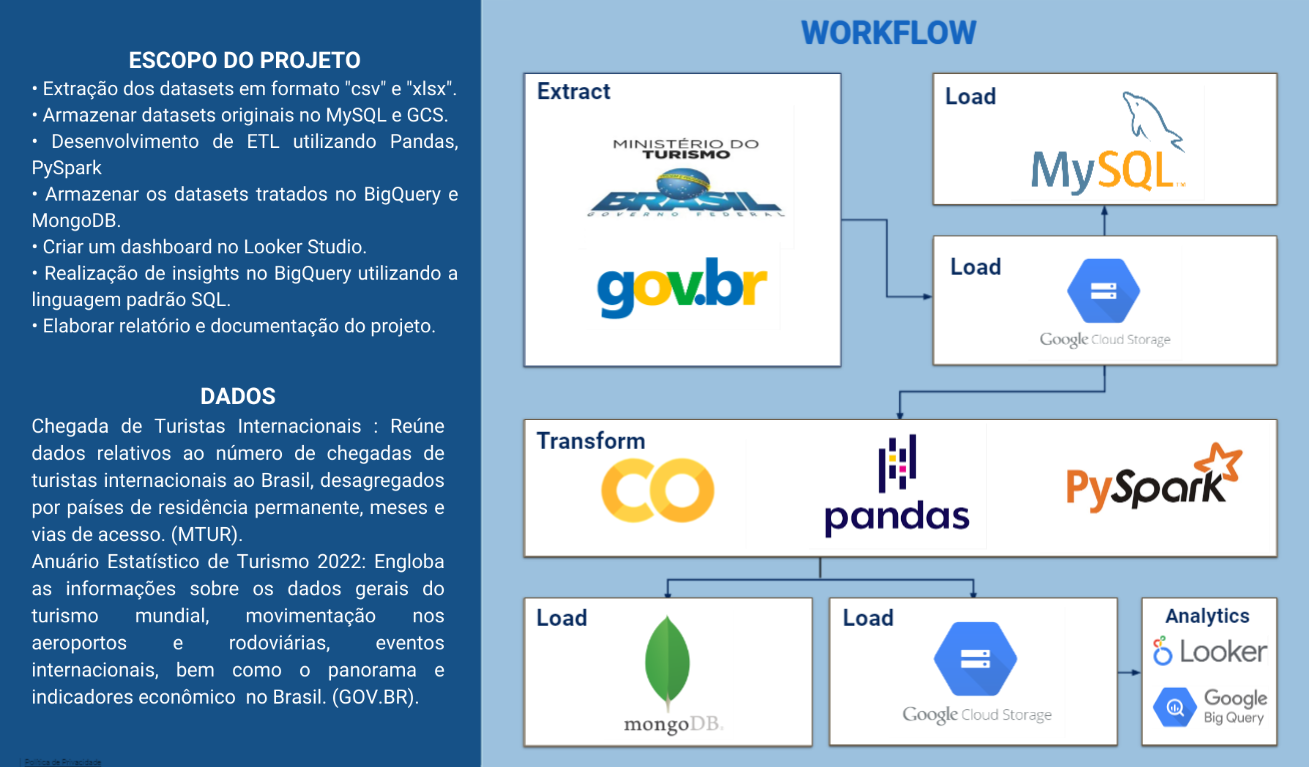

# **Instalação de Bibliotecas**

In [ ]:
!pip install pandera &> /dev/null
!pip install pyspark &> /dev/null 
!pip install pymongo &> /dev/null 
!pip install gcsfs &> /dev/null 
!pip install pymysql &> /dev/null 
!pip install mysql-connector-python &> /dev/null 
!{sys.executable} -m pip install cloud-sql-python-connector["pymysql"] SQLAlchemy &> /dev/null

# **Importação de Bibliotecas**

In [ ]:
# Pandas
import pandas as pd
from datetime import datetime

# Pandera
import pandera as pa

# Numpy
import numpy as np

# PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql.types import StructField 
from pyspark.sql.types import StructType

# Cloud Storage
from google.cloud import storage
import os

# MongoDB
import pymongo
from pymongo import MongoClient

# MYSQL
import sqlalchemy
import mysql.connector
import pymysql
from mysql.connector import Error
from sqlalchemy import create_engine

# **Conexão de Bibliotecas**

**GCP**

In [ ]:
# Configurar Chave de Segurança da GCP
serviceAccount = '/content/aulas-bc26-bruna-e54c75bf2880.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

**MySQL**

In [ ]:
# Dados para conectar com o servidor
servidor = '34.133.255.218' 
nome_do_banco = 'projeto_final' 
usuario = 'root'
senha = 'rootroot' 

# Criar uma SQLAlchemy engine para conectar com o MySQL 
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=servidor, db=nome_do_banco, user=usuario, pw=senha))

**MongoDB**

In [ ]:
# Conectar ao Mongo Atlas
uri = 'mongodb+srv://projeto-final.dzzsboj.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority'
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-8312549437018067454.pem')


**PySpark**

In [ ]:
# Criar a SparkSession
spark = (
    SparkSession.builder
                .master('local')
                .appName('gcsfs')
                .config('spark.ui.port', '4050')
                .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-2.1.1.jar')  
                .getOrCreate()                                                                                         
)

In [ ]:
# Verificar se a SparkSession foi criada
spark

# **Load de Arquivos Originais**

## **Cloud Storage**

Para inserir nossos arquivos no bucket, utilizamos a ferramenta gsutil, que permite acessar o Cloud Storage pela linha de comando.

    gs://BUCKET_NAME/OBJECT_NAME

Para mais informações, acesse a documentação: [Ferramenta gsutil](https://cloud.google.com/storage/docs/gsutil?hl=pt-br)

####Arquivos

**Chegadas_Internacionais_2018.csv**






In [ ]:
# Criar df com o arquivo
df_2018 = pd.read_csv('/content/Chegadas_Internacionais_2018.csv', sep=';', encoding = 'ISO-8859-1')

# Enviar arquivo para a Bucket
df_2018.to_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2018.csv', index=False)

**Chegadas_Internacionais_2019.csv**

In [ ]:
# Criar df com o arquivo
df_2019 = pd.read_csv('/content/Chegadas_Internacionais_2019.csv', sep=';', encoding = 'ISO-8859-1')

# Enviar arquivo para a Bucket
df_2019.to_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2019.csv', index=False)

**Chegadas_Internacionais_2020.csv**

In [ ]:
# Criar df com o arquivo
df_2020 = pd.read_csv('/content/Chegadas_Internacionais_2020.csv', sep=';', encoding = 'ISO-8859-1')

# Enviar arquivo para a Bucket
df_2020.to_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2020.csv', index=False)

**Chegadas_Internacionais_2021.csv**

In [ ]:
# Criar df com o arquivo
df_2021 = pd.read_csv('/content/Chegadas_Internacionais_2021.csv', sep=';', encoding = 'ISO-8859-1')

# Enviar arquivo para a Bucket
df_2021.to_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2021.csv', index=False)

**Chegadas_Inter_Brasil.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_01 = pd.read_excel('Chegadas_Inter_Brasil.xlsx')

# Enviar arquivo para a Bucket
df_excel_01.to_excel('gs://projeto-final-turismo/Originais/Chegadas_Inter_Brasil.xlsx', index=False)

**Eventos_Inter_Brasil.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_02 = pd.read_excel('Eventos_Inter_Brasil.xlsx')

# Enviar arquivo para a Bucket
df_excel_02.to_excel('gs://projeto-final-turismo/Originais/Eventos_Inter_Brasil.xlsx', index=False)

**Indicadores_Economicos.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_03 = pd.read_excel('Indicadores_Economicos.xlsx')

# Enviar arquivo para a Bucket
df_excel_03.to_excel('gs://projeto-final-turismo/Originais/Indicadores_Economicos.xlsx', index=False)

**Mov_Nacional_Aeroportos_Brasil.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_04 = pd.read_excel('Mov_Nacional_Aeroportos_Brasil.xlsx')

# Enviar arquivo para a Bucket
df_excel_04.to_excel('gs://projeto-final-turismo/Originais/Mov_Nacional_Aeroportos_Brasil.xlsx', index=False)

**Mov_Rodoviarias_Brasil.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_05 = pd.read_excel('Mov_Rodoviarias_Brasil.xlsx')

# Enviar arquivo para a Bucket
df_excel_05.to_excel('gs://projeto-final-turismo/Originais/Mov_Rodoviarias_Brasil.xlsx', index=False)

**Resultados_Economicos.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_06 = pd.read_excel('Resultados_Economicos.xlsx')

# Enviar arquivo para a Bucket
df_excel_06.to_excel('gs://projeto-final-turismo/Originais/Resultados_Economicos.xlsx', index=False)

**Receita_Nominal_das_Atividades.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_07 = pd.read_excel('Receita_Nominal_das_Atividades.xlsx')

# Enviar arquivo para a Bucket
df_excel_07.to_excel('gs://projeto-final-turismo/Originais/Receita_Nominal_das_Atividades.xlsx', index=False)

**Volume_de_Atividades.xlsx**

In [ ]:
# Criar df com o arquivo
df_excel_08 = pd.read_excel('Volume_de_Atividades.xlsx')

# Enviar arquivo para a Bucket
df_excel_08.to_excel('gs://projeto-final-turismo/Originais/Volume_de_Atividades.xlsx', index=False)

## **MySQL**

In [ ]:
# Converter dataframe em uma tabela SQL

# Chegadas_Internacionais_2018
df_2018.to_sql('Chegadas_Internacionais_2018', engine, index=True)

# Chegadas_Internacionais_2019
df_2019.to_sql('Chegadas_Internacionais_2019', engine, index=True)

# Chegadas_Internacionais_2020
df_2020.to_sql('Chegadas_Internacionais_2020', engine, index=True)

# Chegadas_Internacionais_2021
df_2021.to_sql('Chegadas_Internacionais_2021', engine, index=True)

# Chegadas_Inter_Brasil
df_excel_01.to_sql('Chegadas_Inter_Brasil', engine, index=True)

# Eventos_Inter_Brasil
df_excel_02.to_sql('Eventos_Inter_Brasil', engine, index=True)

# Indicadores_Economicos
df_excel_03.to_sql('Indicadores_Economicos', engine, index=True)

# Mov_Nacional_Aeroportos_Brasil
df_excel_04.to_sql('Mov_Nacional_Aeroportos_Brasil', engine, index=True)

# Mov_Rodoviarias_Brasil
df_excel_05.to_sql('Mov_Rodoviarias_Brasil', engine, index=True)

# Resultados_Economicos
df_excel_06.to_sql('Resultados_Economicos', engine, index=True)

# Receita_Nominal_das_Atividades
df_excel_07.to_sql('Receita_Nominal_das_Atividades', engine, index=True)

# Volume_de_Atividades
df_excel_08.to_sql('Volume_de_Atividades', engine, index=True)

# **Datasets .csv**

Dados sobre a chegada de turistas internacionais não residentes ao Brasil (2018 - 2021)



## **Pandas**

### **Extrair Dados**

In [ ]:
# Setar 20 colunas de visualização
pd.set_option('display.max_columns',20)

In [ ]:
# Extrair os arquivos da Bucket
df_2018 = pd.read_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2018.csv',sep=',', encoding = 'UTF-8')
df_2019 = pd.read_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2019.csv',sep=',', encoding = 'UTF-8')
df_2020 = pd.read_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2020.csv',sep=',', encoding = 'UTF-8')
df_2021 = pd.read_csv('gs://projeto-final-turismo/Originais/Chegadas_Internacionais_2021.csv',sep=',', encoding = 'UTF-8')

In [ ]:
# Verificar tamanho dos dataframes
print(f'2018: {df_2018.shape}.\n2019: {df_2019.shape}.\n2020: {df_2020.shape}.\n2021: {df_2021.shape}.')

2018: (46872, 12).
2019: (49104, 12).
2020: (47988, 12).
2021: (55800, 12).


In [ ]:
# Verificar se as colunas dos dataframes são iguais
print(df_2018.columns.equals(df_2019.columns),
      df_2019.columns.equals(df_2020.columns),
      df_2020.columns.equals(df_2021.columns))    

True True True


In [ ]:
# Concatenar dataframes
df_geral = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

In [ ]:
# Visualizar dataframe
df_geral

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,março,3,0
3,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,abril,4,0
4,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,maio,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199759,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,agosto,8,0
199760,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,setembro,9,0
199761,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,outubro,10,0
199762,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,novembro,11,0


### **Pré-Análise**

In [ ]:
# Verificar tipo das colunas
df_geral.dtypes

Continente        object
cod continente     int64
País              object
cod pais           int64
UF                object
cod uf             int64
Via               object
cod via            int64
ano                int64
Mês               object
cod mes            int64
Chegadas           int64
dtype: object

In [ ]:
# Verificar dados nulos
df_geral.isna().sum()

Continente        0
cod continente    0
País              0
cod pais          0
UF                0
cod uf            0
Via               0
cod via           0
ano               0
Mês               0
cod mes           0
Chegadas          0
dtype: int64

In [ ]:
# Verificar conteúdo da coluna País
sorted(pd.unique(df_geral['País']))

['Alemanha',
 'Angola',
 'Argentina',
 'Arábia Saudita',
 'Austrália',
 'Bangladesh',
 'Bolívia',
 'Bulgária',
 'Bélgica',
 'Cabo Verde',
 'Canadá',
 'Chile',
 'China',
 'China, Hong Kong',
 'Cingapura',
 'Colômbia',
 'Costa Rica',
 'Croácia',
 'Cuba',
 'Dinamarca',
 'Egito',
 'El Salvador',
 'Equador',
 'Eslováquia',
 'Eslovênia',
 'Espanha',
 'Estados Unidos',
 'Estônia',
 'Filipinas',
 'Finlândia',
 'França',
 'Gana',
 'Grécia',
 'Guatemala',
 'Guiana',
 'Guiana Francesa',
 'Haiti',
 'Holanda',
 'Honduras',
 'Hungria',
 'Indonésia',
 'Irlanda',
 'Irã',
 'Israel',
 'Itália',
 'Japão',
 'Letônia',
 'Lituânia',
 'Luxemburgo',
 'Líbano',
 'Malásia',
 'Marrocos',
 'Moçambique',
 'México',
 'Nicarágua',
 'Nigéria',
 'Noruega',
 'Nova Zelândia',
 'Outros países',
 'Panamá',
 'Paquistão',
 'Paraguai',
 'Países não especificados',
 'Peru',
 'Polônia',
 'Portugal',
 'Quênia',
 'Reino Unido',
 'República Dominicana',
 'República Tcheca',
 'República da Coreia',
 'Romênia',
 'Rússia',
 'Surinam

In [ ]:
# Verificar conteúdo da coluna UF
sorted(pd.unique(df_geral['UF']))

['Acre',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Outras Unidades da Federação',
 'Paraná',
 'Pará',
 'Pernambuco',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Roraima',
 'Santa Catarina',
 'São Paulo']

In [ ]:
# Verificar conteúdo da coluna Via
sorted(pd.unique(df_geral['Via']))

['Aérea', 'Fluvial', 'Marítima', 'Terrestre']

In [ ]:
# Verificar conteúdo da coluna Mês
pd.unique(df_geral['Mês'])

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
      dtype=object)

In [ ]:
# Verificar as primeiras 10 linhas do df
df_geral.head(10)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,março,3,0
3,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,abril,4,0
4,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,maio,5,0
5,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,junho,6,0
6,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,julho,7,0
7,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,agosto,8,0
8,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,setembro,9,0
9,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,outubro,10,0


In [ ]:
# Verificar as últimas 10 linhas do df
df_geral.tail(10)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
199754,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,março,3,0
199755,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,abril,4,0
199756,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,maio,5,0
199757,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,junho,6,0
199758,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,julho,7,0
199759,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,agosto,8,0
199760,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,setembro,9,0
199761,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,outubro,10,0
199762,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,novembro,11,0
199763,Continente não especificado,8,Países não especificados,999,São Paulo,25,Marítima,3,2021,dezembro,12,0


### **Tratar Dados**

In [ ]:
# Backup
dfback = df_geral.copy()

In [ ]:
# Dropar colunas dispensáveis para a análise dos dados
df_geral.drop(['Continente','cod continente','cod pais','cod uf','cod via','cod mes'], axis=1, inplace=True) 

In [ ]:
# Renomear colunas
df_geral.rename(columns={'País':'pais', 'UF':'uf', 'Via':'via', 'Mês':'mes', 'Chegadas':'chegadas'}, inplace=True)                         

In [ ]:
# Reordenar colunas
df_geral = df_geral[['ano','mes','pais','uf','via','chegadas']]

In [ ]:
# Verificar tipo das colunas
df_geral.dtypes

ano          int64
mes         object
pais        object
uf          object
via         object
chegadas     int64
dtype: object

In [ ]:
# Substituir conteúdo
df_geral.replace({'Outros países':'Nao Especificado',
                  'Países não especificados':'Nao Especificado',
                  'Outras Unidades da Federação':'Nao Especificado'}, inplace=True)

In [ ]:
# Substituir caracteres especiais
df_geral.replace(['á','â','ã'],'a',regex=True,inplace=True)
df_geral.replace('Á','A',regex=True,inplace=True)
df_geral.replace(['é','ê'],'e',regex=True,inplace=True)
df_geral.replace('í','i',regex=True,inplace=True)
df_geral.replace('Í','i',regex=True,inplace=True)
df_geral.replace(['ó','ô'],'o',regex=True,inplace=True)
df_geral.replace('ú','u',regex=True,inplace=True)
df_geral.replace('ç','c',regex=True,inplace=True)
df_geral.replace('"','',regex=True,inplace=True)

In [ ]:
df_geral

,ano,mes,pais,uf,via,chegadas
0,2018,janeiro,Africa do Sul,Acre,Fluvial,0
1,2018,fevereiro,Africa do Sul,Acre,Fluvial,0
2,2018,marco,Africa do Sul,Acre,Fluvial,0
3,2018,abril,Africa do Sul,Acre,Fluvial,0
4,2018,maio,Africa do Sul,Acre,Fluvial,0
...,...,...,...,...,...,...
199759,2021,agosto,Nao Especificado,Sao Paulo,Maritima,0
199760,2021,setembro,Nao Especificado,Sao Paulo,Maritima,0
199761,2021,outubro,Nao Especificado,Sao Paulo,Maritima,0
199762,2021,novembro,Nao Especificado,Sao Paulo,Maritima,0


## **PySpark**

### **Pré-Análise**

In [ ]:
schema = (
    StructType([
        StructField('ano', StringType()),
        StructField('mes', StringType()),
        StructField('pais', StringType()),
        StructField('uf', StringType()),
        StructField('via', StringType()),
        StructField('chegadas', IntegerType()),
      
      ])
)

In [ ]:
# Converter df em Pandas para Spark
df_chegadas = spark.createDataFrame(df_geral, schema)

In [ ]:
df_chegadas.printSchema()

root
 |-- ano: string (nullable = true)
 |-- mes: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- uf: string (nullable = true)
 |-- via: string (nullable = true)
 |-- chegadas: integer (nullable = true)



In [ ]:
# Verificar dataframe
df_chegadas.show(truncate=False)

+----+---------+-------------+----+-------+--------+
|ano |mes      |pais         |uf  |via    |chegadas|
+----+---------+-------------+----+-------+--------+
|2018|janeiro  |Africa do Sul|Acre|Fluvial|0       |
|2018|fevereiro|Africa do Sul|Acre|Fluvial|0       |
|2018|marco    |Africa do Sul|Acre|Fluvial|0       |
|2018|abril    |Africa do Sul|Acre|Fluvial|0       |
|2018|maio     |Africa do Sul|Acre|Fluvial|0       |
|2018|junho    |Africa do Sul|Acre|Fluvial|0       |
|2018|julho    |Africa do Sul|Acre|Fluvial|0       |
|2018|agosto   |Africa do Sul|Acre|Fluvial|0       |
|2018|setembro |Africa do Sul|Acre|Fluvial|0       |
|2018|outubro  |Africa do Sul|Acre|Fluvial|0       |
|2018|novembro |Africa do Sul|Acre|Fluvial|0       |
|2018|dezembro |Africa do Sul|Acre|Fluvial|0       |
|2018|janeiro  |Alemanha     |Acre|Fluvial|0       |
|2018|fevereiro|Alemanha     |Acre|Fluvial|0       |
|2018|marco    |Alemanha     |Acre|Fluvial|0       |
|2018|abril    |Alemanha     |Acre|Fluvial|0  

In [ ]:
# Verificar número de linhas do df
df_chegadas.count()

199764

In [ ]:
# Renomear colunas
df_chegadas = (df_chegadas.withColumnRenamed('pais', 'pais_origem')
                .withColumnRenamed('uf', 'uf_destino'))

In [ ]:
# Converter df em Spark para Pandas
df_chegadas = df_chegadas.toPandas()

### **Tratar Dados**

### **Validar Dados**
Uma outra maneira de validar os dados do dataframe é utilizanddo a biblioteca pandera.

    schema = pa.DataFrameSchema(
        columns = {
            'ano':pa.Column(pa.Int),
            'mes':pa.Column(pa.String),
            'pais':pa.Column(pa.String),
            'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True), 
            'via':pa.Column(pa.String),                        
            'chegadas':pa.Column(pa.Int),  
        }
        
    )

In [ ]:
df_chegadas

,ano,mes,pais_origem,uf_destino,via,chegadas
0,2018,janeiro,Africa do Sul,Acre,Fluvial,0
1,2018,fevereiro,Africa do Sul,Acre,Fluvial,0
2,2018,marco,Africa do Sul,Acre,Fluvial,0
3,2018,abril,Africa do Sul,Acre,Fluvial,0
4,2018,maio,Africa do Sul,Acre,Fluvial,0
...,...,...,...,...,...,...
199759,2021,agosto,Nao Especificado,Sao Paulo,Maritima,0
199760,2021,setembro,Nao Especificado,Sao Paulo,Maritima,0
199761,2021,outubro,Nao Especificado,Sao Paulo,Maritima,0
199762,2021,novembro,Nao Especificado,Sao Paulo,Maritima,0


In [ ]:
# Salvar o dataframe como csv
df_chegadas.to_csv('chegadas_internacionais.csv', index=False)

# **Datasets .xlsx**

## **Chegadas_Inter_Brasil** 


In [ ]:
# Extrair o arquivo da Bucket
df_aero_inter = pd.read_excel('gs://projeto-final-turismo/Originais/Chegadas_Inter_Brasil.xlsx',
                               sheet_name=0, header=24, skipfooter=3, usecols='N,P')

In [ ]:
df_aero_inter

,Unnamed: 13,Unnamed: 15
0,2018.0,6621376.0
1,NaN,NaN
2,2019.0,6353141.0
3,NaN,NaN
4,2020.0,2146435.0
5,NaN,NaN
6,2021.0,745871.0


In [ ]:
# Dropar linhas que contenham pelo menos um valor nulo
df_aero_inter.dropna(inplace= True)

In [ ]:
# Resetar index
df_aero_inter.reset_index(inplace=True)

In [ ]:
# Dropar coluna index
df_aero_inter.drop(df_aero_inter.columns[[0]], axis=1, inplace=True)

In [ ]:
# Renomear colunas
df_aero_inter.rename(columns={'Unnamed: 13':'ano',
                              'Unnamed: 15':'aeroporto_internacional'}, inplace=True) 

In [ ]:
# Verificar tipo das colunas
df_aero_inter.dtypes

ano                        float64
aeroporto_internacional    float64
dtype: object

In [ ]:
# Mudar tipo das colunas para inteiro
df_aero_inter['ano'] = df_aero_inter['ano'].astype(int)
df_aero_inter['aeroporto_internacional'] = df_aero_inter['aeroporto_internacional'].astype(int)

## **Mov_Nacional_Aeroportos_Brasil**


In [ ]:
# Extrair o arquivos da Bucket
df_aero_nac = pd.read_excel('gs://projeto-final-turismo/Originais/Mov_Nacional_Aeroportos_Brasil.xlsx', 
                             sheet_name=0, header=43, skipfooter=6, usecols='B,D')

In [ ]:
df_aero_nac

,Unnamed: 1,0
0,2018,95360871.0
1,NaN,0.0
2,2019³,96572429.0
3,NaN,NaN
4,2020³,45834220.0
5,NaN,NaN
6,2021,63133502.0


In [ ]:
# Dropar linhas que contenham pelo menos um valor nulo
df_aero_nac.dropna(inplace=True)

In [ ]:
# Resetar index
df_aero_nac.reset_index(inplace=True)

In [ ]:
# Dropar index
df_aero_nac.drop(df_aero_nac.columns[[0]], axis=1, inplace=True)

In [ ]:
# Renomear colunas
df_aero_nac.rename(columns={'Unnamed: 1':'ano',
                             0:'aeroporto_nacional'}, inplace=True)

In [ ]:
# Verificar tipo das colunas
df_aero_nac.dtypes

ano                    object
aeroporto_nacional    float64
dtype: object

In [ ]:
# Mudar tipo da coluna para inteiro
df_aero_nac['aeroporto_nacional'] = df_aero_nac['aeroporto_nacional'].astype(int)

In [ ]:
# Substituir um dado da coluna
df_aero_nac.replace({'2019³':2019,
                     '2020³':2020}, inplace=True)

In [ ]:
df_aero_nac

,ano,aeroporto_nacional
0,2018,95360871
1,2019,96572429
2,2020,45834220
3,2021,63133502


**Merge:**
* Chegadas_Inter_Brasil: df_aero_inter 
* Mov_Nacional_Aeroportos_Brasil: df_aero_nac

In [ ]:
# Merge dos dataframes
df_aero = pd.merge(df_aero_nac, df_aero_inter, how='left', on = 'ano')

In [ ]:
df_aero

,ano,aeroporto_nacional,aeroporto_internacional
0,2018,95360871,6621376
1,2019,96572429,6353141
2,2020,45834220,2146435
3,2021,63133502,745871


In [ ]:
# Salvar dataframe como csv
df_aero.to_csv('aeroporto_total.csv', index = False)

## **Mov_Rodoviarias_Brasil** 

In [ ]:
# Extrair arquivo da Bucket
df_rod = pd.read_excel('gs://projeto-final-turismo/Originais/Mov_Rodoviarias_Brasil.xlsx',
                        sheet_name=0, header=23, skipfooter=85, usecols='B,F,J,N')

In [ ]:
df_rod

,Unnamed: 1,Unnamed: 5,Unnamed: 9,Unnamed: 13
0,2018.0,42084594.0,41803880.0,280714.0
1,NaN,NaN,NaN,NaN
2,2019.0,39835328.0,39613544.0,221784.0
3,NaN,NaN,NaN,NaN
4,2020.0,15236722.0,15220854.0,15868.0
5,NaN,NaN,NaN,NaN
6,2021.0,18032167.0,18030470.0,1697.0
7,NaN,NaN,NaN,NaN


In [ ]:
# Backup do arquivo original
dfback_rod = df_rod.copy()

In [ ]:
# Dropar linhas que não serão necessárias
df_rod.drop([1, 3, 5, 7], axis=0, inplace=True)

In [ ]:
# Renomear colunas
df_rod.rename(columns={'Unnamed: 1':'ano',
                       'Unnamed: 5':'total',
                       'Unnamed: 9':'rodoviaria_nacional',
                       'Unnamed: 13':'rodoviaria_internacional'}, inplace=True)

In [ ]:
# Verificar tipo das colunas
df_rod.dtypes

ano                         float64
total                       float64
rodoviaria_nacional         float64
rodoviaria_internacional    float64
dtype: object

In [ ]:
# Mudar tipo da coluna para inteiro
df_rod = df_rod.astype(int)

In [ ]:
# Resetar index
df_rod.reset_index(inplace=True)

In [ ]:
# Dropar index
df_rod.drop(['index'], axis=1, inplace= True)

In [ ]:
df_rod

,ano,total,rodoviaria_nacional,rodoviaria_internacional
0,2018,42084594,41803880,280714
1,2019,39835328,39613544,221784
2,2020,15236722,15220854,15868
3,2021,18032167,18030470,1697


In [ ]:
# Salvar o dataframe como csv
df_rod.to_csv('rodovia_total.csv', index = False)

##**Eventos_Inter_Brasil**

In [ ]:
# Extrair arquivo da Bucket
df_eventos_inter = pd.read_excel('gs://projeto-final-turismo/Originais/Eventos_Inter_Brasil.xlsx', 
                                  sheet_name=0, header=3, skipfooter=9, usecols='B,D,H,J,L,N')

In [ ]:
# Verificar as primeiras 10 linhas do df
df_eventos_inter.head(10)

,Unnamed: 1,Unnamed: 3,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13
0,Ranking \nBrasil 2019,Cidades,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2018.0,2019.0,2020.0,2021.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,-,Brasil,216.0,209.0,6.0,4.0
5,1,São Paulo - SP,60.0,56.0,1.0,0.0
6,2,Rio de Janeiro - RJ,46.0,33.0,3.0,3.0
7,3,Foz do Iguaçu - PR,17.0,15.0,0.0,0.0
8,4,Brasília - DF,12.0,11.0,0.0,0.0
9,5,Salvador - BA,9.0,9.0,0.0,0.0


**Pandas**

In [ ]:
# Backup do arquivo original
dfback_eventos = df_eventos_inter.copy()

In [ ]:
# Atribuir outra variável para preservar o backup
df_eventos = df_eventos_inter

In [ ]:
# Verificar as primeiras 10 linhas do df
df_eventos.head(10)

,Unnamed: 1,Unnamed: 3,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13
0,Ranking \nBrasil 2019,Cidades,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2018.0,2019.0,2020.0,2021.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,-,Brasil,216.0,209.0,6.0,4.0
5,1,São Paulo - SP,60.0,56.0,1.0,0.0
6,2,Rio de Janeiro - RJ,46.0,33.0,3.0,3.0
7,3,Foz do Iguaçu - PR,17.0,15.0,0.0,0.0
8,4,Brasília - DF,12.0,11.0,0.0,0.0
9,5,Salvador - BA,9.0,9.0,0.0,0.0


In [ ]:
# Dropar linhas que não serão utilizadas
df_eventos.drop([0,1,2,3,4], axis=0, inplace=True)

In [ ]:
# Preencher valores vazios
df_eventos.fillna(0, inplace = True)

In [ ]:
# Renomear colunas
df_eventos.rename(columns={'Unnamed: 1':'ranking_brasil',
                           'Unnamed: 3':'cidade',
                           'Unnamed: 7':'2018',
                           'Unnamed: 9':'2019',
                           'Unnamed: 11':'2020',
                           'Unnamed: 13':'2021'}, inplace=True)

In [ ]:
# Verificar tipo de dados das colunas
df_eventos.dtypes

ranking_brasil      int64
cidade             object
2018              float64
2019              float64
2020              float64
2021              float64
dtype: object

In [ ]:
# Mudar as colunas de float para int
df_eventos['2018'] = df_eventos['2018'].astype(int)
df_eventos['2019'] = df_eventos['2019'].astype(int)
df_eventos['2020'] = df_eventos['2020'].astype(int)
df_eventos['2021'] = df_eventos['2021'].astype(int)

In [ ]:
# Verificar as primeiras 10 linhas do df
df_eventos.head(10)

,ranking_brasil,cidade,2018,2019,2020,2021
5,1,São Paulo - SP,60,56,1,0
6,2,Rio de Janeiro - RJ,46,33,3,3
7,3,Foz do Iguaçu - PR,17,15,0,0
8,4,Brasília - DF,12,11,0,0
9,5,Salvador - BA,9,9,0,0
10,6,Porto Alegre - RS,6,9,0,1
11,7,Curitiba - PR,6,8,1,0
12,8,Florianópolis - SC,9,7,1,0
13,9,Belo Horizonte - MG,6,7,0,0
14,10,Campinas - SP,6,6,0,0


**Spark**

In [ ]:
# Criar o schema
esquema = (
    StructType([
        StructField('ranking_brasil', StringType()),
        StructField('cidade', StringType()),
        StructField('2018', IntegerType()),
        StructField('2019', IntegerType()),
        StructField('2020', IntegerType()),
        StructField('2021', IntegerType()),    
    ])
)

In [ ]:
# Converter dataframe para o formato spark
df_eventos = spark.createDataFrame(df_eventos, schema=esquema)

In [ ]:
# Visualizar o dataframe
df_eventos.show()

+--------------+--------------------+----+----+----+----+
|ranking_brasil|              cidade|2018|2019|2020|2021|
+--------------+--------------------+----+----+----+----+
|             1|      São Paulo - SP|  60|  56|   1|   0|
|             2| Rio de Janeiro - RJ|  46|  33|   3|   3|
|             3|  Foz do Iguaçu - PR|  17|  15|   0|   0|
|             4|       Brasília - DF|  12|  11|   0|   0|
|             5|       Salvador - BA|   9|   9|   0|   0|
|             6|   Porto Alegre - RS|   6|   9|   0|   1|
|             7|       Curitiba - PR|   6|   8|   1|   0|
|             8|  Florianópolis - SC|   9|   7|   1|   0|
|             9| Belo Horizonte - MG|   6|   7|   0|   0|
|            10|       Campinas - SP|   6|   6|   0|   0|
|            11|         Recife - PE|   4|   5|   0|   0|
|            12|      Fortaleza - CE|   7|   5|   0|   0|
|            13| Ribeirão Preto - SP|   2|   4|   0|   0|
|            14|         Santos - SP|   2|   2|   0|   0|
|            1

In [ ]:
# Criar uma nova coluna a partir de uma já existente
df_eventos = (df_eventos.withColumn('uf', F.substring(F.col('cidade'), -2, 2)))

In [ ]:
# Visualizar nova coluna
df_eventos.show()

+--------------+--------------------+----+----+----+----+---+
|ranking_brasil|              cidade|2018|2019|2020|2021| uf|
+--------------+--------------------+----+----+----+----+---+
|             1|      São Paulo - SP|  60|  56|   1|   0| SP|
|             2| Rio de Janeiro - RJ|  46|  33|   3|   3| RJ|
|             3|  Foz do Iguaçu - PR|  17|  15|   0|   0| PR|
|             4|       Brasília - DF|  12|  11|   0|   0| DF|
|             5|       Salvador - BA|   9|   9|   0|   0| BA|
|             6|   Porto Alegre - RS|   6|   9|   0|   1| RS|
|             7|       Curitiba - PR|   6|   8|   1|   0| PR|
|             8|  Florianópolis - SC|   9|   7|   1|   0| SC|
|             9| Belo Horizonte - MG|   6|   7|   0|   0| MG|
|            10|       Campinas - SP|   6|   6|   0|   0| SP|
|            11|         Recife - PE|   4|   5|   0|   0| PE|
|            12|      Fortaleza - CE|   7|   5|   0|   0| CE|
|            13| Ribeirão Preto - SP|   2|   4|   0|   0| SP|
|       

In [ ]:
# Passar dataframe para o pandas
df_eventos = df_eventos.toPandas()

**Pandas**

In [ ]:
# Visualizr a coluna cidade
pd.unique(df_eventos['cidade'])

array(['São Paulo - SP', 'Rio de Janeiro - RJ', 'Foz do Iguaçu - PR',
       'Brasília - DF', 'Salvador - BA', 'Porto Alegre - RS',
       'Curitiba - PR', 'Florianópolis - SC', 'Belo Horizonte - MG',
       'Campinas - SP', 'Recife - PE', 'Fortaleza - CE',
       'Ribeirão Preto - SP', 'Santos - SP', 'Niterói - RJ',
       'Bento Gonçalves - RS', 'Rio Grande - RS', 'Campo Grande - MS',
       'Corumbá - MS', 'Natal - RN', 'Goiânia - GO', 'São Leopoldo - RS',
       'Gramado - RS', 'Maceió - AL', 'Joinville - SC', 'Guarujá - SP',
       'João Pessoa - PB', 'Aguas de Lindoia - SP', 'Alegrete - RS',
       'Araraquara - SP', 'Boa Vista - RR', 'Londrina - PR',
       'Praia Grande - SP', 'Santa Rita do Sapucai - MG',
       'São Carlos - SP', 'São José - SC', 'Sorocaba - SP',
       'Treze Ilhas - SC', 'Ubatuba - SP', 'Uberlândia - MG',
       'Viamão - RS', 'Porto Seguro - BA', 'Manaus - AM',
       'Santa Maria - RS', 'São Sebastião (Maresias) - SP',
       'Vitória - ES', 'Ouro Preto -

In [ ]:
# Retirar o uf da coluna cidade
df_eventos['cidade'].replace([' - SP',' - RJ', ' - PR', ' - DF', ' - BA', ' - RS',
             ' - SC', ' - MG', ' - PE', ' - CE', ' - MS', ' - RN',
             ' - GO', ' - AL', ' - SC', ' - PB', ' - RR', ' - AM', ' - ES'],'',regex=True,inplace=True)

In [ ]:
# Reordenar colunas
df_eventos = df_eventos[['ranking_brasil','cidade','uf','2018','2019','2020','2021']]

In [ ]:
# Substituir caracteres especiais
df_eventos.replace(['ã','á','â'],'a',regex=True,inplace=True)
df_eventos.replace('é','e',regex=True,inplace=True)
df_eventos.replace('í','i',regex=True,inplace=True)
df_eventos.replace('ó','o',regex=True,inplace=True)
df_eventos.replace('ç','c',regex=True,inplace=True)

In [ ]:
# Verificar as primeiras 10 linhas do df
df_eventos.head(10)

,ranking_brasil,cidade,uf,2018,2019,2020,2021
0,1,Sao Paulo,SP,60,56,1,0
1,2,Rio de Janeiro,RJ,46,33,3,3
2,3,Foz do Iguacu,PR,17,15,0,0
3,4,Brasilia,DF,12,11,0,0
4,5,Salvador,BA,9,9,0,0
5,6,Porto Alegre,RS,6,9,0,1
6,7,Curitiba,PR,6,8,1,0
7,8,Florianopolis,SC,9,7,1,0
8,9,Belo Horizonte,MG,6,7,0,0
9,10,Campinas,SP,6,6,0,0


In [ ]:
# Salvar o dataframe como csv
df_eventos.to_csv('eventos_inter.csv', index = False)

**Soma de eventos**

In [ ]:
# Verificar as primeiras 10 linhas do df
df_eventos_inter.head(10)

,ranking_brasil,cidade,2018,2019,2020,2021
5,1,São Paulo - SP,60,56,1,0
6,2,Rio de Janeiro - RJ,46,33,3,3
7,3,Foz do Iguaçu - PR,17,15,0,0
8,4,Brasília - DF,12,11,0,0
9,5,Salvador - BA,9,9,0,0
10,6,Porto Alegre - RS,6,9,0,1
11,7,Curitiba - PR,6,8,1,0
12,8,Florianópolis - SC,9,7,1,0
13,9,Belo Horizonte - MG,6,7,0,0
14,10,Campinas - SP,6,6,0,0


In [ ]:
# Somar a quantidade de eventos por ano
soma_2018 = df_eventos['2018'].sum()
soma_2019 = df_eventos['2019'].sum()
soma_2020 = df_eventos['2020'].sum()
soma_2021 = df_eventos['2021'].sum()

print(f'2018: {soma_2018} eventos.\n2019: {soma_2019} eventos.\n2020: {soma_2020} eventos.\n2021: {soma_2021} eventos.')

2018: 216 eventos.
2019: 209 eventos.
2020: 6 eventos.
2021: 4 eventos.


In [ ]:
# Criar um dataframe com o total de eventos por ano
total = {'ano': ['2018','2019','2020','2021'],
         'total_eventos': ['216','209','6','4']}

df_total =  pd.DataFrame(total).astype(int)

In [ ]:
# Visualizar novo dataframe
df_total

,ano,total_eventos
0,2018,216
1,2019,209
2,2020,6
3,2021,4


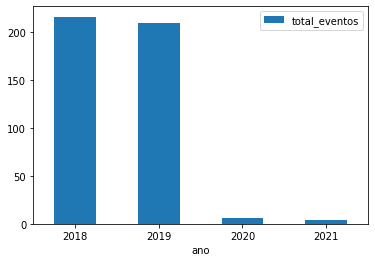

In [ ]:
# Comparar a quantidade de eventos internacionais antes e durante a pandemia
df_total.plot.bar(x='ano', y='total_eventos', rot=0)

In [ ]:
# Salvar novo dataframe
df_total.to_csv('total_eventos.csv', index=False)

In [ ]:
# Criar df com o arquivo
df_total = pd.read_csv('/content/total_eventos.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_total.to_csv('gs://projeto-final-turismo/Tratados/total_eventos.csv', index=False)

## **Indicadores_Economicos**

In [ ]:
# Extrair arquivo da Bucket
df_dolar = pd.read_excel('gs://projeto-final-turismo/Originais/Indicadores_Economicos.xlsx', 
                          sheet_name=0, header=41, skipfooter=8, usecols='B,H,J')

In [ ]:
# Visualizar dataframe
df_dolar

,Unnamed: 1,Unnamed: 7,Unnamed: 9
0,2018.0,3.6552,3.6558
1,NaN,NaN,NaN
2,2019.0,3.9455,3.9461
3,NaN,NaN,NaN
4,2020.0,5.1572,5.1578
5,NaN,NaN,NaN
6,2021.0,5.3949,5.3956


In [ ]:
# Dropar linhas que contenham pelo menos um valor nulo
df_dolar.dropna(inplace= True)

In [ ]:
# Renomear colunas
df_dolar.rename(columns={'Unnamed: 1':'ano',
                         'Unnamed: 7':'dolar_compra',
                         'Unnamed: 9':'dolar_venda'}, inplace=True) 

In [ ]:
# Resetar index
df_dolar.reset_index(inplace=True)

In [ ]:
# Dropar index
df_dolar.drop(df_dolar.columns[[0]], axis=1, inplace=True)

In [ ]:
# Visualizar tipo de dados
df_dolar.dtypes

ano             float64
dolar_compra    float64
dolar_venda     float64
dtype: object

In [ ]:
# Mudar o tipo de dado da coluna ano
df_dolar['ano'] = df_dolar['ano'].astype(int)

In [ ]:
df_dolar = df_dolar.round(2)

In [ ]:
# Salvar o dataframe como csv
df_dolar.to_csv('cambio_dolar.csv', index=False)

## **Resultados_Economicos**

In [ ]:
# Extrair arquivo da Bucket
df_result_economico = pd.read_excel('gs://projeto-final-turismo/Originais/Resultados_Economicos.xlsx',
                                     sheet_name=0, header=42, skipfooter=5, usecols='B,D,F,H')

In [ ]:
# Visualizar dataframe
df_result_economico

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7
0,2018.0,5921.000000,18266.000000,-12345.000000
1,NaN,NaN,NaN,NaN
2,2019.0,5995.000000,17593.000000,-11599.000000
3,NaN,NaN,NaN,NaN
4,2020.0,3044.000000,5394.000000,-2350.000000
5,NaN,NaN,NaN,NaN
6,2021.0,2947.340269,5249.739944,-2302.399674


In [ ]:
# Renomear colunas
df_result_economico.rename(columns={'Unnamed: 1':'ano',
                                    'Unnamed: 3':'receita',
                                    'Unnamed: 5':'despesa',
                                    'Unnamed: 7':'saldo'},inplace=True)

In [ ]:
# # Dropar linhas que contenham pelo menos um valor nulo
df_result_economico.dropna(inplace= True)

In [ ]:
# Verificar tipo de dados
df_result_economico.dtypes

ano        float64
receita    float64
despesa    float64
saldo      float64
dtype: object

In [ ]:
# Mudar o tipo de dados da coluna ano para int
df_result_economico['ano'] = df_result_economico['ano'].astype(int)

In [ ]:
# Resetar index
df_result_economico.reset_index(inplace=True)

In [ ]:
# Dropar index
df_result_economico.drop(df_result_economico.columns[[0]], axis=1, inplace=True)

In [ ]:
df_result_economico = df_result_economico.round(2)

In [ ]:
# Salvar o dataframe como csv
df_result_economico.to_csv('result_economico.csv', index=False)

## **Receita_Nominal_das_Atividades**

**VARIAÇÃO DA RECEITA ANUAL**

In [ ]:
# Extrair arquivo da Bucket
df_variacao_receita = pd.read_excel('gs://projeto-final-turismo/Originais/Receita_Nominal_das_Atividades.xlsx',
                                     sheet_name=0, header=6, skipfooter=29, usecols='B,F,J,N')

In [ ]:
# Visualizar dataframe
df_variacao_receita

,Unnamed: 1,Mês do ano anterior (%),Mês do ano anterior (%).1,Mês do ano anterior (%).2
0,Janeiro,10.2,4.5,-32.8
1,Fevereiro,7.3,10.2,-33.5
2,Março,8.8,-29.4,-20.7
3,Abril,7.9,-67.8,73.6
4,Maio,12.0,-65.4,97.3
5,Junho,12.4,-61.6,90.5
6,Julho,9.6,-61.1,96.4
7,Agosto,4.9,-49.2,64.1
8,Setembro,5.4,-43.3,54.7
9,Outubro,8.2,-34.7,41.7


In [ ]:
# Renomear colunas
df_variacao_receita.rename(columns={'Unnamed: 1':'mes',
                                    'Mês do ano anterior (%)':'receita_2018_2019',
                                    'Mês do ano anterior (%).1':'receita_2019_2020',
                                    'Mês do ano anterior (%).2':'receita_2020_2021'},inplace=True)

In [ ]:
# Verificar tipo dos dados
df_variacao_receita.dtypes

mes                   object
receita_2018_2019    float64
receita_2019_2020    float64
receita_2020_2021    float64
dtype: object

In [ ]:
# Substituir caracteres especiais
df_variacao_receita.replace('ç','c',regex=True,inplace=True)

**RECEITA POR UF**

In [ ]:
# Extrair arquivo da Bucket
df_receita_uf = pd.read_excel('gs://projeto-final-turismo/Originais/Receita_Nominal_das_Atividades.xlsx',
                               sheet_name=0, header=32, skipfooter=3, usecols='B,D,H,L')

In [ ]:
# Visualizar dataframe
df_receita_uf

,Brasil,8.2,-38.1,26.5
0,Ceará,7.1,-39.0,24.6
1,Pernambuco,4.0,-42.2,45.2
2,Bahia,6.9,-38.3,48.0
3,Minas Gerais,8.0,-35.8,35.3
4,Espírito Santo,7.8,-37.8,36.8
5,Rio de Janeiro,6.6,-33.9,21.7
6,São Paulo,11.4,-40.5,18.0
7,Paraná,2.5,-35.3,18.2
8,Santa Catarina,3.7,-31.5,22.1
9,Rio Grande do Sul,5.8,-45.7,38.7


In [ ]:
# Renomear colunas
df_receita_uf.rename(columns={'Brasil':'uf',
                               8.2:'receita_2018_2019',
                               -38.1:'receita_2019_2020',
                               26.5:'receita_2020_2021'},inplace=True)

In [ ]:
# Verificar tipo de dados
df_receita_uf.dtypes

uf                    object
receita_2018_2019    float64
receita_2019_2020    float64
receita_2020_2021    float64
dtype: object

## **Volume_de_Atividades**

**VOLUME ANUAL**

In [ ]:
# Extrair arquivo da Bucket
df_vol_atividades = pd.read_excel('gs://projeto-final-turismo/Originais/Volume_de_Atividades.xlsx', 
                                  sheet_name=0, header=6, skipfooter=30, usecols='B,F,J,N') 

In [ ]:
# Visualizar dataframe
df_vol_atividades

,Unnamed: 1,Mês do ano anterior (%),Mês do ano anterior (%).1,Mês do ano anterior (%).2
0,Janeiro,3.8,3.4,-29.3
1,Fevereiro,5.0,6.4,-31.2
2,Março,2.0,-28.3,-19.2
3,Abril,0.0,-67.2,72.5
4,Maio,5.0,-65.5,102.5
5,Junho,2.0,-58.6,92.6
6,Julho,4.5,-56.2,82.9
7,Agosto,-2.9,-44.7,53.8
8,Setembro,1.0,-38.5,37.0
9,Outubro,4.3,-33.5,25.6


In [ ]:
# Renomear colunas
df_vol_atividades.rename(columns={'Unnamed: 1':'mes',
                                  'Mês do ano anterior (%)':'atividade_2018_2019',
                                  'Mês do ano anterior (%).1':'atividade_2019_2020',
                                  'Mês do ano anterior (%).2':'atividade_2020_2021'},inplace=True)

In [ ]:
# Substituir caracteres especiais
df_vol_atividades.replace('ç','c',regex=True,inplace=True)

In [ ]:
# Verificar tipo de dados
df_vol_atividades.dtypes

mes                     object
atividade_2018_2019    float64
atividade_2019_2020    float64
atividade_2020_2021    float64
dtype: object

**VOLUME UF**

In [ ]:
# Exrtair arquivo da Bucket
df_atividade_uf = pd.read_excel('gs://projeto-final-turismo/Originais/Volume_de_Atividades.xlsx',
                                 sheet_name=0, header=32, skipfooter=4, usecols='B,D,H,L')

In [ ]:
# Visualizar dataframe
df_atividade_uf

,Brasil,2.6,-36.7,22.2
0,Ceará,4.8,-41.0,19.5
1,Pernambuco,0.9,-39.2,41.1
2,Bahia,1.3,-37.2,47.5
3,Minas Gerais,2.8,-35.3,31.7
4,Espírito Santo,2.9,-34.6,28.0
5,Rio de Janeiro,2.4,-31.0,16.9
6,São Paulo,5.1,-40.0,12.0
7,Paraná,-3.1,-34.2,13.7
8,Santa Catarina,-2.3,-30.4,18.9
9,Rio Grande do Sul,0.2,-43.3,39.2


In [ ]:
# Renomear colunas
df_atividade_uf.rename(columns={'Brasil':'uf',
                                2.6:'atividade_2018_2019',
                                -36.7:'atividade_2019_2020',
                                22.2:'atividade_2020_2021'},inplace=True)

In [ ]:
# Verificar tipo de dados
df_atividade_uf.dtypes

uf                      object
atividade_2018_2019    float64
atividade_2019_2020    float64
atividade_2020_2021    float64
dtype: object

Merge:

**df_rec_ativ_mes**: df_variacao_receita + df_vol_atividades

In [ ]:
# Juntar os dataframes 
df_rec_ativ_mes = pd.merge(df_variacao_receita,  df_vol_atividades, how='left', on = 'mes')

In [ ]:
# Visualizar novo dataframe
df_rec_ativ_mes

,mes,receita_2018_2019,receita_2019_2020,receita_2020_2021,atividade_2018_2019,atividade_2019_2020,atividade_2020_2021
0,Janeiro,10.2,4.5,-32.8,3.8,3.4,-29.3
1,Fevereiro,7.3,10.2,-33.5,5.0,6.4,-31.2
2,Marco,8.8,-29.4,-20.7,2.0,-28.3,-19.2
3,Abril,7.9,-67.8,73.6,0.0,-67.2,72.5
4,Maio,12.0,-65.4,97.3,5.0,-65.5,102.5
5,Junho,12.4,-61.6,90.5,2.0,-58.6,92.6
6,Julho,9.6,-61.1,96.4,4.5,-56.2,82.9
7,Agosto,4.9,-49.2,64.1,-2.9,-44.7,53.8
8,Setembro,5.4,-43.3,54.7,1.0,-38.5,37.0
9,Outubro,8.2,-34.7,41.7,4.3,-33.5,25.6


In [ ]:
# Salvar o dataframe como csv
df_rec_ativ_mes.to_csv('receita_atividade_mes.csv', index=False)

Merge:


**df_rec_ativ_uf**: df_receita_uf + df_atividade_uf

In [ ]:
# Juntar dataframes
df_rec_ativ_uf = pd.merge(df_receita_uf,  df_atividade_uf, how='left', on = 'uf')

In [ ]:
# Visualizando novo dataframe
df_rec_ativ_uf

,uf,receita_2018_2019,receita_2019_2020,receita_2020_2021,atividade_2018_2019,atividade_2019_2020,atividade_2020_2021
0,Ceará,7.1,-39.0,24.6,4.8,-41.0,19.5
1,Pernambuco,4.0,-42.2,45.2,0.9,-39.2,41.1
2,Bahia,6.9,-38.3,48.0,1.3,-37.2,47.5
3,Minas Gerais,8.0,-35.8,35.3,2.8,-35.3,31.7
4,Espírito Santo,7.8,-37.8,36.8,2.9,-34.6,28.0
5,Rio de Janeiro,6.6,-33.9,21.7,2.4,-31.0,16.9
6,São Paulo,11.4,-40.5,18.0,5.1,-40.0,12.0
7,Paraná,2.5,-35.3,18.2,-3.1,-34.2,13.7
8,Santa Catarina,3.7,-31.5,22.1,-2.3,-30.4,18.9
9,Rio Grande do Sul,5.8,-45.7,38.7,0.2,-43.3,39.2


In [ ]:
# Substituir caracteres especiais
df_rec_ativ_uf.replace(['ã','á','â'],'a',regex=True,inplace=True)
df_rec_ativ_uf.replace('é','e',regex=True,inplace=True)
df_rec_ativ_uf.replace('í','i',regex=True,inplace=True)
df_rec_ativ_uf.replace('ó','o',regex=True,inplace=True)
df_rec_ativ_uf.replace('ç','c',regex=True,inplace=True)

In [ ]:
# Salvar o dataframe como csv
df_rec_ativ_uf.to_csv('receita_atividade_uf.csv', index=False)

# **Load de Arquivos Tratados**

## **Cloud Storage**

**chegadas_internacionais.csv**

In [ ]:
# Criar df com o arquivo
df_01 = pd.read_csv('/content/chegadas_internacionais.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_01.to_csv('gs://projeto-final-turismo/Tratados/chegadas_internacionais.csv', index=False)

**aeroporto_total.csv**

In [ ]:
# Criar df com o arquivo
df_02 = pd.read_csv('/content/aeroporto_total.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_02.to_csv('gs://projeto-final-turismo/Tratados/aeroporto_total.csv', index=False)

**rodovia_total.csv**

In [ ]:
# Criar df com o arquivo
df_03 = pd.read_csv('/content/rodovia_total.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_03.to_csv('gs://projeto-final-turismo/Tratados/rodovia_total.csv', index=False)

**eventos_inter.csv**

In [ ]:
# Criar df com o arquivo
df_04 = pd.read_csv('/content/eventos_inter.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_04.to_csv('gs://projeto-final-turismo/Tratados/eventos_inter.csv', index=False)

**cambio_dolar.csv**

In [ ]:
# Criar df com o arquivo
df_05 = pd.read_csv('/content/cambio_dolar.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_05.to_csv('gs://projeto-final-turismo/Tratados/cambio_dolar.csv', index=False)

**result_economico.csv**

In [ ]:
# Criar df com o arquivo
df_06 = pd.read_csv('/content/result_economico.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_06.to_csv('gs://projeto-final-turismo/Tratados/result_economico.csv', index=False)

**receita_atividade_mes.csv**

In [ ]:
# Criar df com o arquivo
df_07 = pd.read_csv('/content/receita_atividade_mes.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_07.to_csv('gs://projeto-final-turismo/Tratados/receita_atividade_mes.csv', index=False)

**receita_atividade_uf.csv**

In [ ]:
# Criar df com o arquivo
df_08 = pd.read_csv('/content/receita_atividade_uf.csv', sep=',', encoding = 'UTF-8')

# Enviar arquivo para a Bucket
df_08.to_csv('gs://projeto-final-turismo/Tratados/receita_atividade_uf.csv', index=False)

## **MongoDB**

In [ ]:
# Transformar os dataframes em dicionários
df_chegadas_dict = df_chegadas.to_dict('records')
df_aero_dict = df_aero.to_dict('records')
df_rod_dict = df_rod.to_dict('records')
df_eventos_dict = df_eventos.to_dict('records')
df_dolar_dict = df_dolar.to_dict('records')
df_result_economico_dict = df_result_economico.to_dict('records')
df_rec_ativ_mes_dict = df_rec_ativ_mes.to_dict('records')
df_rec_ativ_uf_dict = df_rec_ativ_uf.to_dict('records')
df_total_dict = df_total.to_dict('records')

In [ ]:
# Nomear database e coleções
db = client['Turismo']
colecao1 = db['chegadas_internacionais']
colecao2 = db['aeroporto_total']
colecao3 = db['rodovia_total']
colecao4 = db['eventos_inter']
colecao5 = db['cambio_dolar']
colecao6 = db['result_economico']
colecao7 = db['receita_atividade_mes']
colecao8 = db['receita_atividade_uf']
colecao9 = db['total_eventos']

In [ ]:
# Inserir arquivos nas coleções
try:
  colecao1.insert_many(df_chegadas_dict)
  colecao2.insert_many(df_aero_dict)
  colecao3.insert_many(df_rod_dict)
  colecao4.insert_many(df_eventos_dict)
  colecao5.insert_many(df_dolar_dict)
  colecao6.insert_many(df_result_economico_dict)
  colecao7.insert_many(df_rec_ativ_mes_dict)
  colecao8.insert_many(df_rec_ativ_uf_dict)
  colecao9.insert_many(df_total_dict)


except Exception as error:
  print(f'Erro: {error}.')
else:  
  print('Conexão bem sucedida!')

Conexão bem sucedida!
